# Moving Average models

A **Moving Average** model expresses the value of a time series as a linear combination of lagged independent normally distributed errors.

## What we will accomplish:
* Define an $\operatorname{MA}(q)$ model:  a moving average process of order $q$.
* Look at the $\operatorname{MA}(1)$ special case more closely.
* Discuss how to use an autocorrelation plot to select $q$.

## The $\operatorname{MA}(q)$ model

The $\operatorname{MA}(q)$ model is

$$
y_t = \epsilon_t + \alpha_1 \epsilon_{t-1} + \alpha_2 \epsilon_{t-2} + \dots + \alpha_q \epsilon_{t-q}
$$

where $\epsilon_t \sim \operatorname{NID}(0,\sigma^2)$

$q$ is a hyperparameter and the $\alpha_i$ and $\sigma^2$ are parameters which need to be fit.  We will not dive into *how* these parameters are fit in this bootcamp.

Our focus will be on understanding the model and selecting $q$.

I also highly recommend [this CrossValidated question](https://stats.stackexchange.com/q/45026) for some thoughts about underlying mechanisms which could realistic generate moving average processes.

We will start by understanding the $\operatorname{MA}(1)$ model.

### The $\operatorname{MA}(1)$ model

The $\operatorname{MA}(1)$ model is:

$$y_t = \epsilon_t + \alpha \epsilon_{t-1} \textrm{ with } \epsilon_j \sim \operatorname{NID}(0,\sigma^2) $$

You might be wondering how this is different from gaussian white noise with variance $(1 + \alpha^2)\sigma^2$.  

The key difference is autocorrelation!  While gaussian white noise has $0$ autocorrelation, this one has

$$
\begin{align*}
\operatorname{ACF}(1) 
&= \frac{\operatorname{Cov}(y_{t+1},y_t)}{\operatorname{Var}(y_t)}\\
&= \frac{\operatorname{Cov}(\epsilon_{t+1} + \alpha \epsilon_{t} ,\epsilon_t + \alpha \epsilon_{t-1} )}{\operatorname{Cov}(\epsilon_{t} + \alpha \epsilon_{t-1} ,\epsilon_t + \alpha \epsilon_{t-1} )}\\
&= \frac{\alpha \sigma^2}{(1 + \alpha^2)\sigma^2}\\
&= \frac{\alpha}{1+\alpha^2}
\end{align*}
$$

On the other hand (via a similar calculation) $\operatorname{ACF}(k) = 0$ for $k > 1$.

Let's look at a simple example.

$$
y_t = \epsilon_t + \frac{1}{2} \epsilon_{t-1} 
$$

Any given "shock" $\epsilon_t$ will have a "full impact" at time $t$, it will "persist" at strength $\frac{1}{2} \epsilon_t$ at time $t+1$, and it will have no impact afterwards.

Let's simulate this $\operatorname{MA}(1)$ process, visualize it, and look at an autocorrelation plot.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

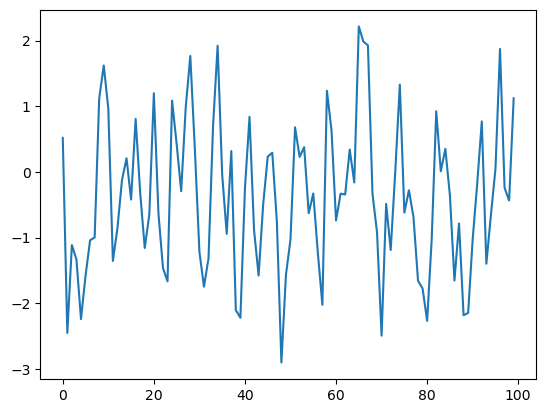

In [2]:
xs = range(100)
es = np.random.randn(101)
y = es[1:] + 0.5*es[:-1]

plt.plot(xs,y)
plt.show()

This may not look much different from white noise, but the difference becomes more apparent when we include a "large" shock:

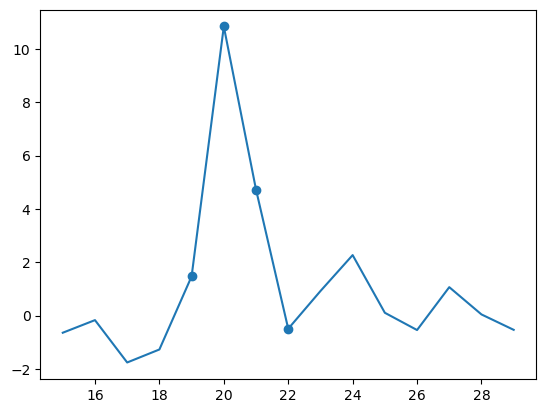

In [3]:
xs = range(100)
es = np.random.randn(101)
es[21] = 10
y = es[1:] + 0.5*es[:100]

plt.plot(xs[15:30],y[15:30])
plt.scatter(xs[19:23],y[19:23])
plt.show()

In [4]:
# A large "shock" of around 10 should be present, persisting at a value of around 5 in the next time step, and then going back to normal.
np.round(y,2)[15:30]

array([-0.64, -0.17, -1.76, -1.27,  1.47, 10.84,  4.73, -0.49,  0.92,
        2.27,  0.11, -0.54,  1.07,  0.05, -0.53])

We can see that the only significant autocorrelation is for the first lag using the $\operatorname{ACF}$ plot.

In [5]:
import statsmodels.api as sm

In [6]:
xs = range(100)
es = np.random.randn(101)
y = es[1:] + 0.5*es[:-1]

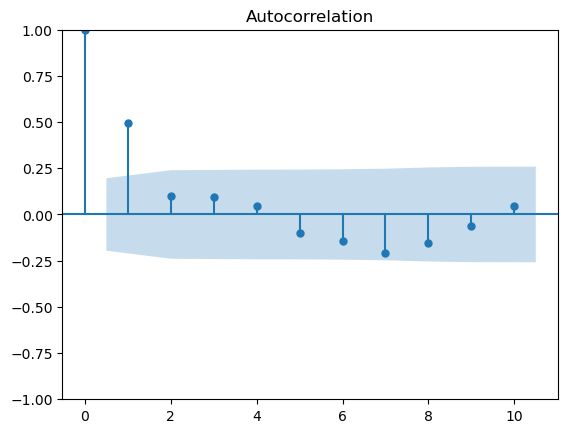

In [7]:
sm.graphics.tsa.plot_acf(y, lags = 10)
plt.show()

In [8]:
print("The theoretical ACF is ",0.5/(1+0.5**2))
print("The computed ACF is ", sm.tsa.stattools.acf(y)[1])

The theoretical ACF is  0.4
The computed ACF is  0.4965557406978479


## Autocorrelation of $\operatorname{MA}(q)$

Since the $\epsilon_t$ are independent the only way to generate a non-zero covariance between $y_t$ and $y_{t+k}$ is to have the same $\epsilon_j$ appearing in both slots of the covariance operator. 

Thus $\operatorname{ACF}(k) = 0$ when $k>q$ for an $MA(q)$ process.

When we have some time series data $y_t$ and we want to model it as an $\operatorname{MA}(q)$ process we will look at the $\operatorname{ACF}$ and choose $q$ to be the last significant lag!

Let's do it for some simulated data:

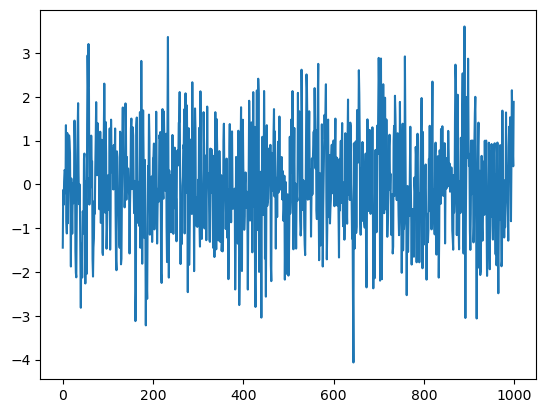

In [9]:
xs = range(1000)
es = np.random.randn(1002)
y = es[2:] + 0.5*es[1:1001] - 0.3*es[0:1000]

plt.plot(xs,y)
plt.show()

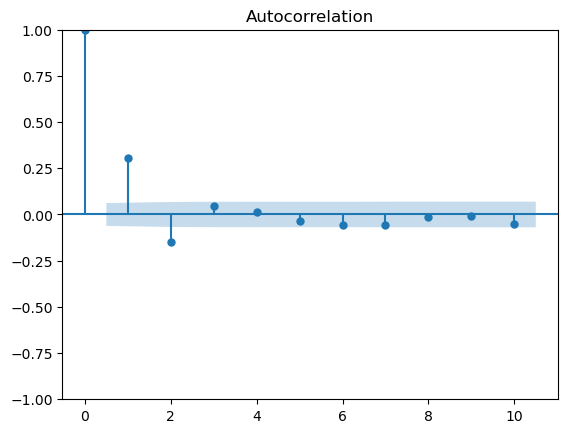

In [10]:
sm.graphics.tsa.plot_acf(y, lags = 10)
plt.show()

We have already discussed how the google closing price data, even when differenced, does not appear stationary since it has increasing variance over time.  So we know that a moving average model is not appropriate.  However, we can still plot the autocorrelation and just see what comes up.

In [11]:
goog = pd.read_csv("../../data/google_stock.csv", parse_dates=['date'])

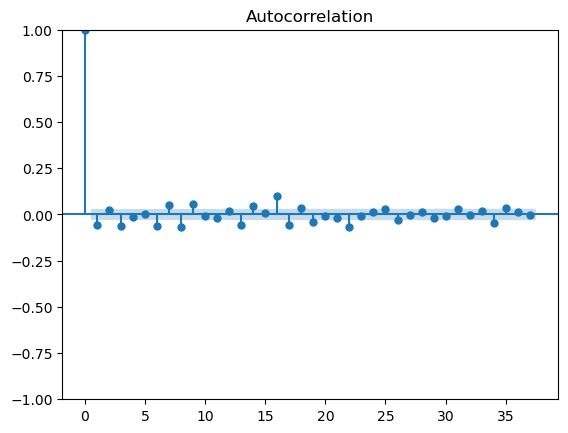

In [12]:
sm.graphics.tsa.plot_acf(goog.closing_price.diff()[1:])
plt.show()

As you can see we have many significant lags, further pointing the inappropriateness of modeling with an $\operatorname{MA}(q)$ process.

--------------------------

This notebook was written for the Erdős Institute Data Science Boot Camp by Steven Gubkin.

Please refer to the license in this repo for information on redistribution.